In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplot
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [3]:
tre=np.array([1081.43,
              1107.25,
              1249.36,
              1400.13,
              1565.90,
              3799.61,
              7395.81,
              12673.03,
             71021.1,
            241031.1,
            5201111,
            20101211
            ])
de=np.array([111.63,119.39,143.83,235.98,391.18,2831.77,10877.56,
             24253.2,266954.006027716,1066321.80982717,26632320.1528028,106517457.862972])

spark = np.array([185.5,
                203.62,
                215.31,
                253,
                324.62,
                984.06,  
                2799.78,
                5609.28,
                53275.78,
                206370.8,
                5031131,
                20062081,
                ])

gco=np.array([229.85, 231.94, 234.95, 240.35, 248.00, 268.50, 307.96,
              347.89, 600.31, 987.55, 3737.52, 7811.83])



In [4]:
## Memory units is MiB
memory_df=pd.DataFrame({'trendsceek':tre,'SpatialDE':de,'scGCO':gco,'spark':spark},
                   index=[100,250,500,1000,1500,5000,10000,15000,50000,100000,500000,1000000])
memory_df

,trendsceek,SpatialDE,scGCO,spark
100,1081.43,1.116300e+02,229.85,185.50
250,1107.25,1.193900e+02,231.94,203.62
500,1249.36,1.438300e+02,234.95,215.31
1000,1400.13,2.359800e+02,240.35,253.00
1500,1565.90,3.911800e+02,248.00,324.62
5000,3799.61,2.831770e+03,268.50,984.06
10000,7395.81,1.087756e+04,307.96,2799.78
15000,12673.03,2.425320e+04,347.89,5609.28
50000,71021.10,2.669540e+05,600.31,53275.78
100000,241031.10,1.066322e+06,987.55,206370.80


In [9]:
## MiB -- GB
print('When memory is GB: ','\n',memory_df.iloc[-1,:]/1024,'GB')

## TB 
print('When memory is TB: ','\n',memory_df.iloc[-1,:]/1024/1024, 'TB')

When memory is GB:  
 trendsceek     19630.088867
SpatialDE     104020.954944
scGCO              7.628740
spark          19591.875977
Name: 1000000, dtype: float64 GB
When memory is TB:  
 trendsceek     19.170009
SpatialDE     101.582964
scGCO           0.007450
spark          19.132691
Name: 1000000, dtype: float64 TB


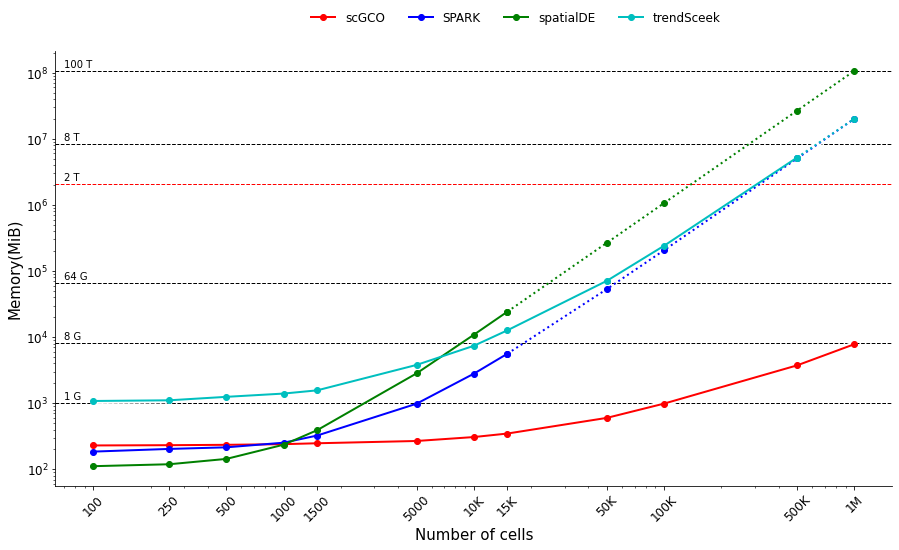

In [10]:
memory=memory_df

pyplot.subplots(figsize=(15,8))
pyplot.yscale('log')
pyplot.xscale('log')

colors={'trendsceek':'tab:grey',"scGCO":'tab:red'}
for method in colors:
    pyplot.plot(memory.index.values,memory.loc[:,method],lw=6,color="w",label='')


pyplot.plot(memory.index.values,memory.scGCO.values,'r-',marker='.',lw=2,ms=12,label='scGCO')

pyplot.plot(memory.iloc[0:8,3].index, memory.iloc[0:8,3].values, 'b-',marker='.',lw=2,ms=12,label='SPARK')
pyplot.plot(memory.iloc[7:,3].index, memory.iloc[7:,3].values, 'b:',marker='.',lw=2,ms=12)

pyplot.plot(memory.iloc[0:8,1].index.values,memory.iloc[0:8,1].values,'g-',marker='.',lw=2,ms=12,label='spatialDE')
pyplot.plot(memory.iloc[7:,1].index.values,memory.iloc[7:,1].values,'g:',marker='.',lw=2,ms=12)

pyplot.plot(memory.iloc[0:-1,0].index.values,memory.iloc[0:-1,0].values,'c-',marker='.',lw=2,ms=12,
            label='trendSceek')
pyplot.plot(memory.iloc[-2:,0].index.values,memory.iloc[-2:,0].values,'c:',marker='.',lw=2,ms=12)



#plt.legend(numpoints=2,  frameon=False)
plt.xlabel("Number of cells",size=15)

plt.ylabel("Memory(MiB)",size=15)
#pyplot.title('Running Memory(100 genes)',size=18)

plt.axhline(1024,lw=1,c='k',zorder=0,ls='--')
plt.annotate('1 G',(70,1024*1.05),va='bottom')

plt.axhline(1024*8,lw=1,c='k',zorder=0,ls='--')
plt.annotate('8 G',(70,1024*1.05*8),va='bottom')

plt.axhline(1024*64,lw=1,c='k',zorder=0,ls='--')
plt.annotate('64 G',(70,1024*1.05*64),va='bottom')

plt.axhline(1024*1024*2,lw=1,c='r',zorder=0,ls='--')
plt.annotate('2 T',(70,1024*1.05*1024*2),va='bottom')

plt.axhline(1024*1024*8,lw=1,c='k',zorder=0,ls='--')
plt.annotate('8 T',(70,1024*1.05*1024*8),va='bottom')

plt.axhline(1024*1024*100,lw=1,c='k',zorder=0,ls='--')
plt.annotate('100 T',(70,1024*1.05*1024*100),va='bottom')


xtick=[100,250,500,1000,1500,5000,10000,15000,50000,100000,500000,1000000]
xlabel=['100','250','500','1000','1500','5000','10K','15K','50K','100K','500K','1M']
plt.xticks(xtick,xlabel,rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=4,loc=(0.3,1.05),fontsize=12,frameon=False)
plt.savefig('../../results/Figure/Fig2g.pdf')
pyplot.show()